In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pmdarima as pm
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/Unsupervised learning project (Time Series)/BTC-USD.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3223,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3228 non-null   datetime64[ns]
 1   Open       3228 non-null   float64       
 2   High       3228 non-null   float64       
 3   Low        3228 non-null   float64       
 4   Close      3228 non-null   float64       
 5   Adj Close  3228 non-null   float64       
 6   Volume     3228 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 176.7 KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
std,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.set_index('Date', inplace=True)
df.drop(columns = 'index', inplace = True)
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074


In [ ]:
# df

In [ ]:
# df.set_index('Date',drop = True)

In [ ]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-20'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

<Axes: xlabel='Date'>

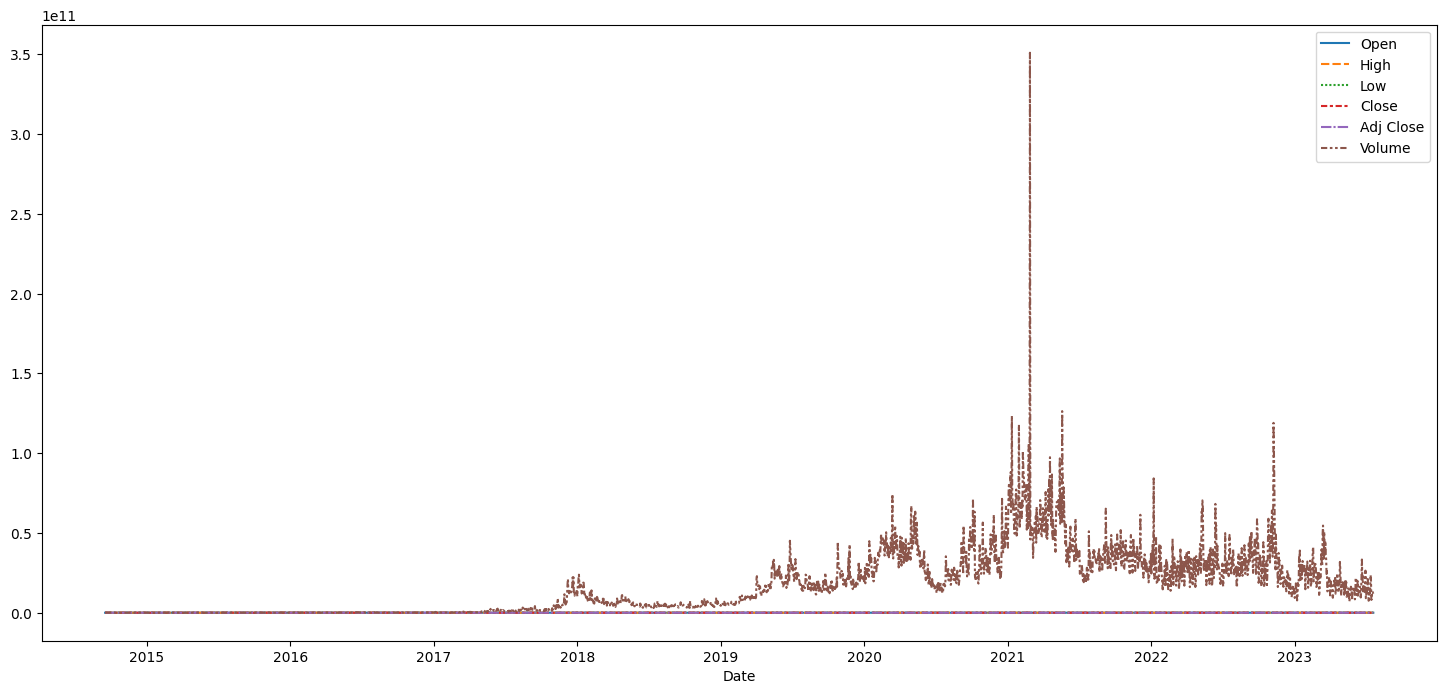

In [ ]:
plt.figure( figsize = ( 18, 8))
sns.lineplot(data=df)

In [ ]:
# data = df['Close']
# Date1 = df['Date']
# train1 = df[['Date','Close']]
# train2 = train1.set_index('Date')
# print (type(train2))
# print (train2.head())
# plt.plot(train2)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Price in USD', fontsize=12)
# plt.title("Closing price distribution of bitcoin", fontsize=15)
# plt.show()

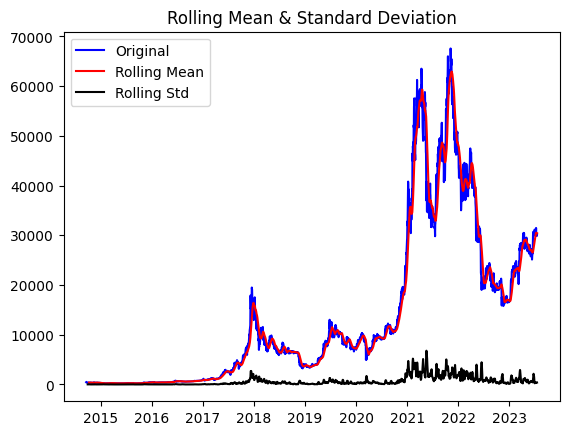

ADF Stastistic: -1.540436
p-value: 0.513422
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey Fuller test
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

ts = df['Close']
test_stationarity(ts)

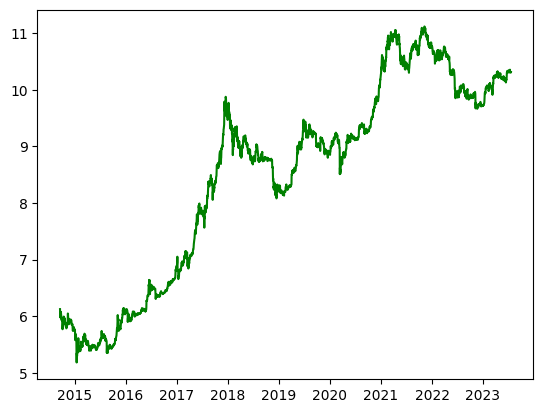

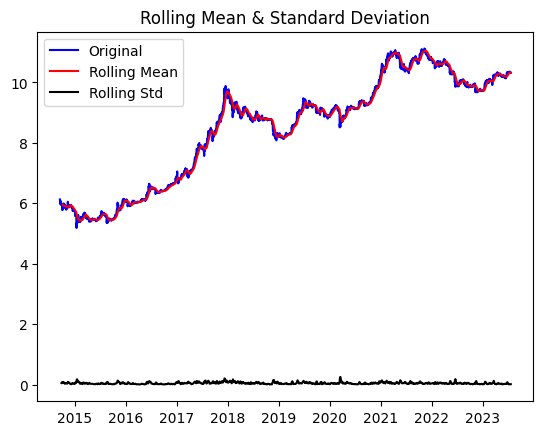

ADF Stastistic: -0.907092
p-value: 0.785628
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

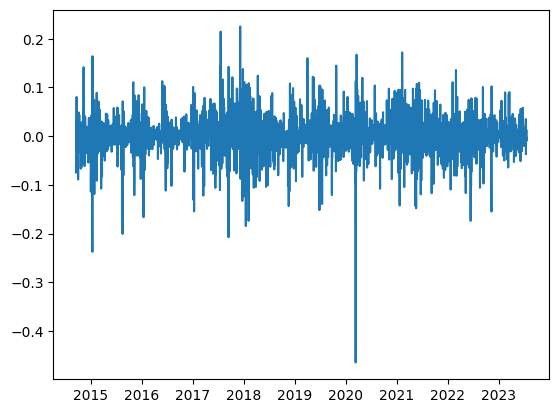

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

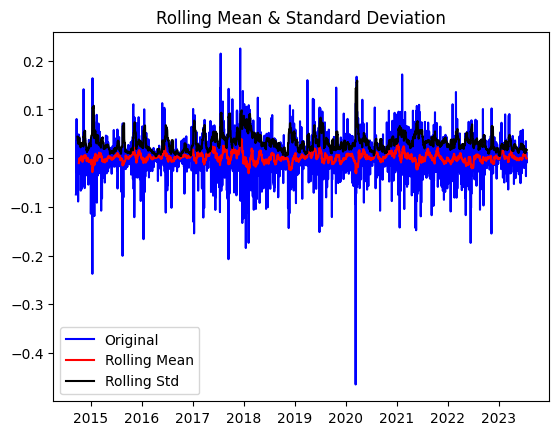

ADF Stastistic: -17.210510
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
# # follow lag
# model = ARIMA(ts_log, order=(1,1,0))
# results_ARIMA = model.fit(disp=-1)
# plt.plt(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
# plt.show()

In [ ]:
ts_log

Date
2014-09-17     6.125414
2014-09-18     6.050771
2014-09-19     5.978369
2014-09-20     6.013480
2014-09-21     5.988513
                ...    
2023-07-15    10.318765
2023-07-16    10.317223
2023-07-17    10.313804
2023-07-18    10.304160
2023-07-20    10.315263
Name: Close, Length: 3228, dtype: float64

In [ ]:
from pmdarima import auto_arima
#ignore harmless warnngs
import warnings
warnings.filterwarnings('ignore')

result=auto_arima(ts_log,trace=True,suppress_warnimgs=True)
result.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11948.680, Time=2.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11955.367, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11954.417, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11954.395, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11953.589, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11952.447, Time=1.90 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3228
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5979.684
Date:                Tue, 26 Mar 2024   AIC                         -11955.367
Time:                        17:09:47   BIC                         -11943.209
Sample:                             0   HQIC                        -11951.010
                               - 3228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.901      0.057   -4.05e-05       0.003
sigma2         0.0014   1.43e-05    100.441      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):             16837.18
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.76
Prob(H) (two-sided):                  0.87   Kurtosis:                        14.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Printing Predicted vs Expected Values...


predicted = 23387.576231,   expected = 23231.732422,   error = 0.670823  %
predicted = 23242.581141,   expected = 23164.628906,   error = 0.336514  %
predicted = 23164.596974,   expected = 22714.978516,   error = 1.979392  %
predicted = 22723.042984,   expected = 22465.478516,   error = 1.146490  %
predicted = 22466.515258,   expected = 22609.164063,   error = 0.630934  %
predicted = 22604.255491,   expected = 21361.701172,   error = 5.816739  %
predicted = 21386.426148,   expected = 21239.753906,   error = 0.690555  %
predicted = 21231.698563,   expected = 22930.548828,   error = 7.408677  %
predicted = 22895.428015,   expected = 23843.886719,   error = 3.977786  %
predicted = 23840.313552,   expected = 23804.632813,   error = 0.149890  %
predicted = 23812.407633,   expected = 23656.207031,   error = 0.660294  %
predicted = 23658.688125,   expected = 23336.896484,   error = 1.378896  %
predicted = 23341.738865,   expected = 23314.199219,   er

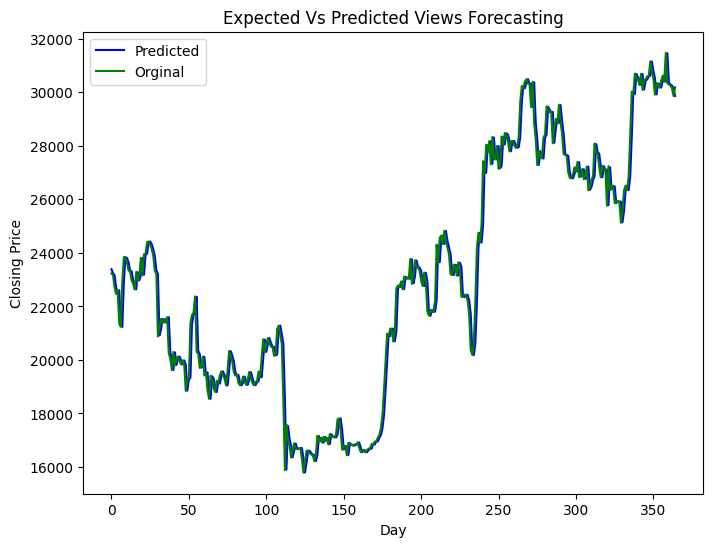

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value
for t in range(len(test_arima)):
    model = ARIMA(history,order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t]
    history.append(original_value)

    pred_value = np.exp(pred_value)


    original_value = np.exp(original_value)

    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'blue')
plt.plot(test_day, originals, color = 'green')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

Printing Predicted vs Expected Values...


predicted = 23389.433594,   expected = 23231.732422,   error = 0.678818  %
predicted = 23231.732422,   expected = 23164.628906,   error = 0.289681  %
predicted = 23164.628906,   expected = 22714.978516,   error = 1.979533  %
predicted = 22714.978516,   expected = 22465.478516,   error = 1.110593  %
predicted = 22465.478516,   expected = 22609.164063,   error = 0.635519  %
predicted = 22609.164063,   expected = 21361.701172,   error = 5.839717  %
predicted = 21361.701172,   expected = 21239.753906,   error = 0.574146  %
predicted = 21239.753906,   expected = 22930.548828,   error = 7.373548  %
predicted = 22930.548828,   expected = 23843.886719,   error = 3.830491  %
predicted = 23843.886719,   expected = 23804.632813,   error = 0.164900  %
predicted = 23804.632813,   expected = 23656.207031,   error = 0.627428  %
predicted = 23656.207031,   expected = 23336.896484,   error = 1.368265  %
predicted = 23336.896484,   expected = 23314.199219,   er

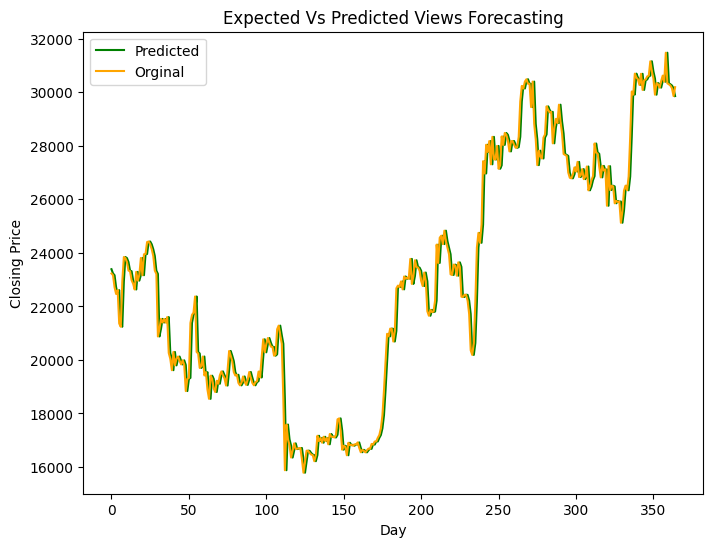

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value
for t in range(len(test_arima)):
    model = ARIMA(history,order=(0, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t]
    history.append(original_value)

    pred_value = np.exp(pred_value)


    original_value = np.exp(original_value)

    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3227
Model:                 ARIMA(0, 1, 0)   Log Likelihood                5975.485
Date:                Tue, 26 Mar 2024   AIC                         -11948.970
Time:                        17:16:21   BIC                         -11942.891
Sample:                             0   HQIC                        -11946.791
                               - 3227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014   1.41e-05    102.231      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):             16819.70
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.76
Prob(H) (two-sided):                  0.91   Kurtosis:                        14.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ts_log.columns = ['log_close']

In [ ]:
ts_log.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-20'],
              dtype='datetime64[ns]', name='Date', length=3228, freq=None)

In [ ]:
ts_log.tail(365)

Date
2022-07-20    10.053274
2022-07-21    10.050382
2022-07-22    10.030780
2022-07-23    10.019735
2022-07-24    10.026111
                ...    
2023-07-15    10.318765
2023-07-16    10.317223
2023-07-17    10.313804
2023-07-18    10.304160
2023-07-20    10.315263
Name: Close, Length: 365, dtype: float64

In [ ]:
ts_log_df = pd.DataFrame(ts_log)
ts_log_df


,Close
Date,
2014-09-17,6.125414
2014-09-18,6.050771
2014-09-19,5.978369
2014-09-20,6.013480
2014-09-21,5.988513
...,...
2023-07-15,10.318765
2023-07-16,10.317223
2023-07-17,10.313804


In [ ]:
ts_log_df

,Close
Date,
2014-09-17,6.125414
2014-09-18,6.050771
2014-09-19,5.978369
2014-09-20,6.013480
2014-09-21,5.988513
...,...
2023-07-15,10.318765
2023-07-16,10.317223
2023-07-17,10.313804


In [ ]:
# # ts_log_df['forecast']=model_fit.predict(start=3200,end=3227,dynamic=Flase)
model_fit.plot_predict(dynamic=False)

# # ts_log_df[['Close','forecast']].plot(figsize=(12,8))

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [ ]:
!pip install statsmodels

In [ ]:
# Generate predictions
forecast = model_fit.forecast(steps=28)

# Add predictions to the DataFrame
ts_log_df['forecast'] = forecast

# Plot the actual values and predictions
ts_log_df[['Close', 'forecast']].plot(figsize=(12, 8))

ValueError: Length of values (28) does not match length of index (3228)

In [ ]:
predictions = model_fit.predict(start=pd.to_datetime('2022-06-20'), end=pd.to_datetime('2023-07-30'))
# Print the predictions
print(predictions)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# index_future_dates = pd.date_range(start = '2023-07-21 ', end = '2023-07-30' )
# pred = model_fit.predict(start=len(ts_log_df), end = len(ts_log_df)+9, dynamic= True)
# print(pred)

[10.30415994 10.30415994 10.30415994 10.30415994 10.30415994 10.30415994
 10.30415994 10.30415994 10.30415994 10.30415994]
